# Mini-projeto SI - Árvores de Decisão

Grupo:

- Júlio Cesar Farias da Luz - jcfl
- Matheus Rodrigues Bueno Godinho - mrbg
- Caio de Mendonça Barbosa - cmb2
- João Paulo de Albuquerque Rocha - jpar
- Mácio Meneses Monteiro Jr - mmmj
- Allan Soares Vasconcelos - asv

O objetivo deste projeto é usar aprendizagem de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

# Introdução e Imports

In [36]:
#Imports necessários

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

np.random.seed(33)

In [37]:
# # Pegando o dataset do drive para rodar no colab
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/gdrive

In [38]:
# Carregando os dados

train = pd.read_csv('train.csv')

# Análise Exploratória dos Dados

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos observar que as colunas "Age", "Embarked" e "Cabin" possuem elementos nulos. Principalmente "Cabin" possui vários elementos NULL e um tratamento será necessário. 

In [41]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [42]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [43]:
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Como há um grande número de linhas que possuem valores NaNs (708 de um total de 891 linhas), podemos concluir que é uma má ideia dropar as linhas que tenham valores faltando. Posteriormente vamos pensar em uma forma de tratar esses valores

### Visualização dos dados

Abaixo podemos visualizar a relevância de algumas features que de primeira vista parecem não ser tão essenciais. Por exemplo, podemos verificar que há uma chance consideravelmente maior do passageiro ter sobrevivido caso ele tenha embarcado do ponto "C". E que mulheres sobreviveram consideravelmente mais do que homens.

<AxesSubplot:xlabel='Parch', ylabel='count'>

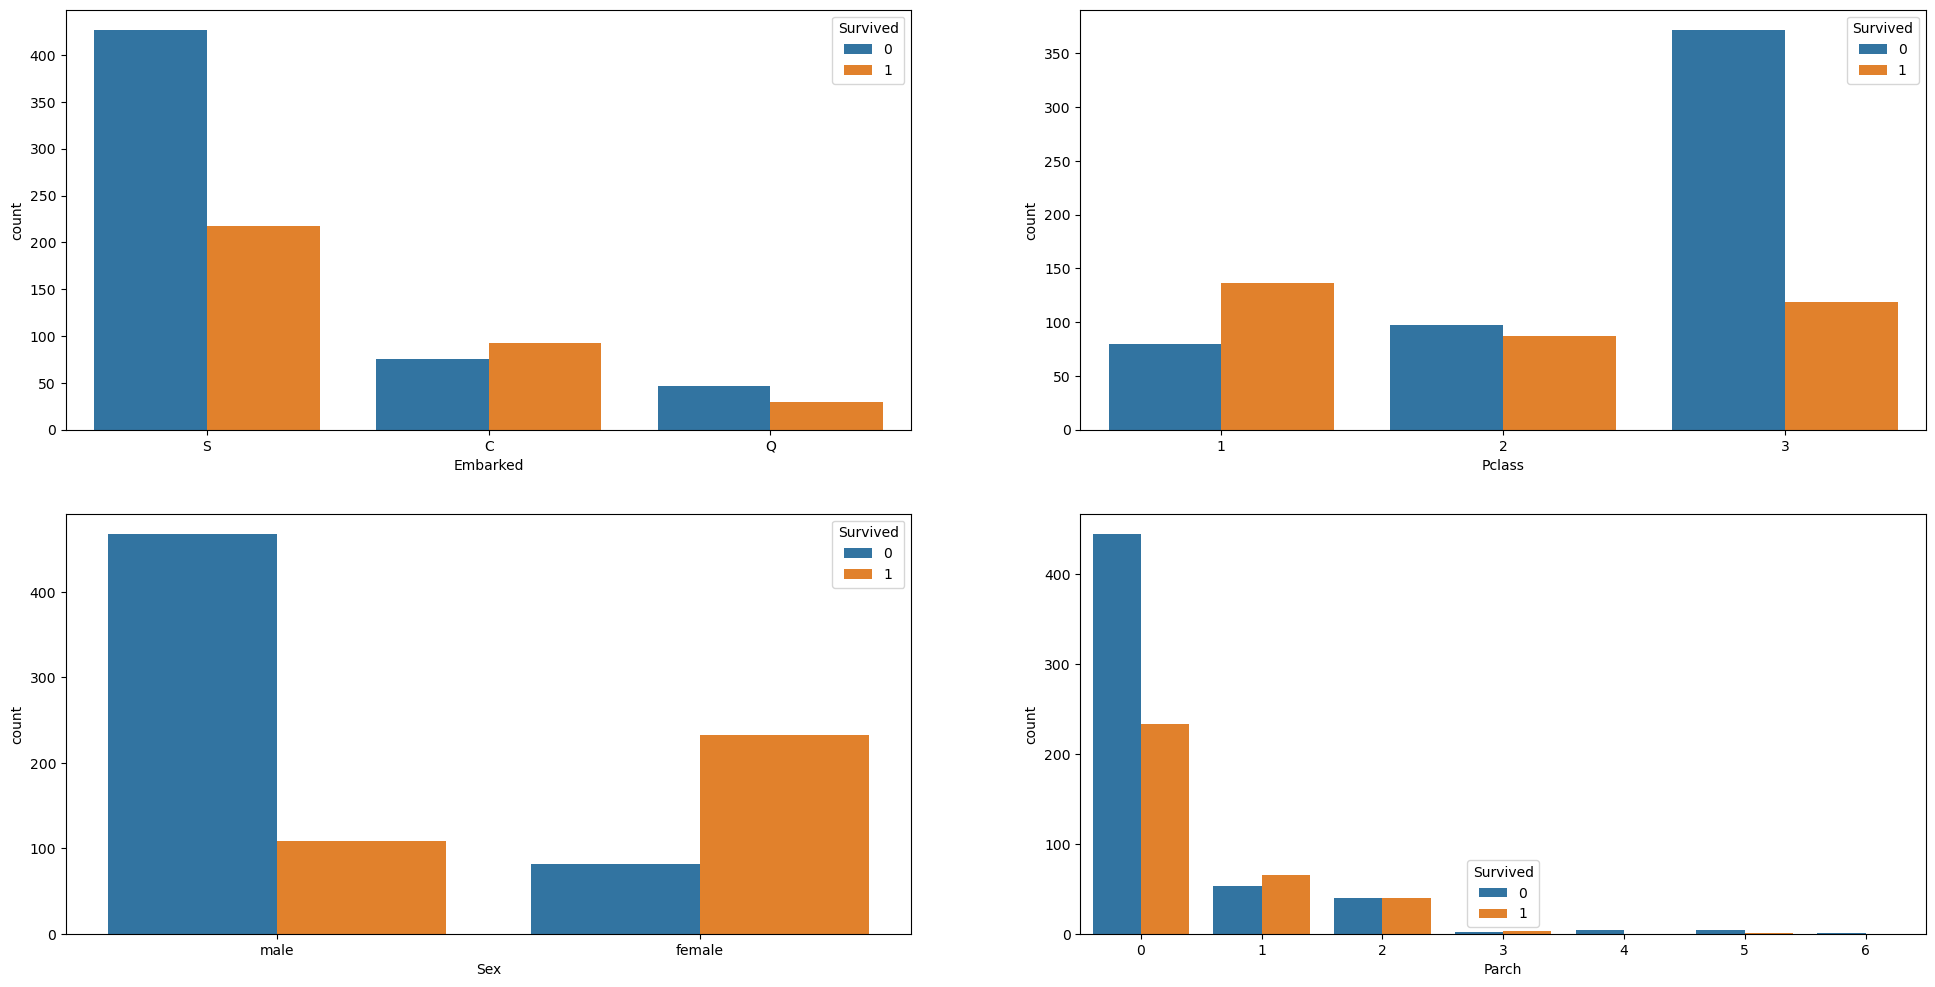

In [44]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches((24,12))

sns.countplot(data=train, x='Embarked', hue='Survived', ax=axes[0, 0])
sns.countplot(data=train, x='Pclass', hue='Survived', ax=axes[0, 1])
sns.countplot(data=train, x='Sex', hue='Survived', ax=axes[1, 0])
sns.countplot(data=train, x='Parch', hue='Survived', ax=axes[1, 1])

No gráfico abaixo podemos notar que pessoas que estavam acompanhadas de seus irmãos tem mais chances de sobreviver do que pessoas que estavam sozinhas na viagem

<AxesSubplot:xlabel='SibSp', ylabel='count'>

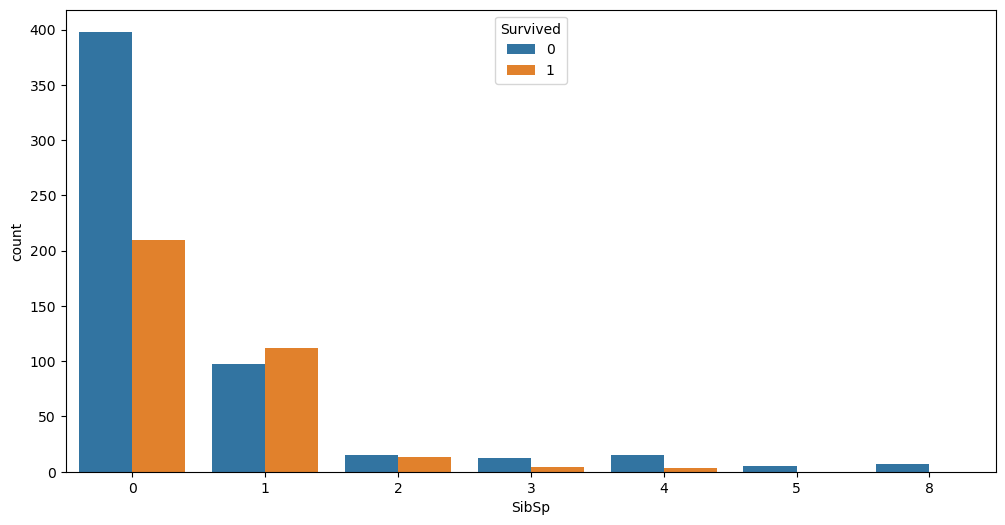

In [45]:
fig, axes = plt.subplots(1)
fig.set_size_inches((12,6))
sns.countplot(data=train, x='SibSp', hue='Survived')

Analisando as features numéricas, podemos ver que há uma tendência para crianças e bebês sobreviverem, enquanto que passageiros que compraram passagens mais baratas tem mais chance de morrerem.

[Text(0.5, 1.0, 'Histograma - Fare')]

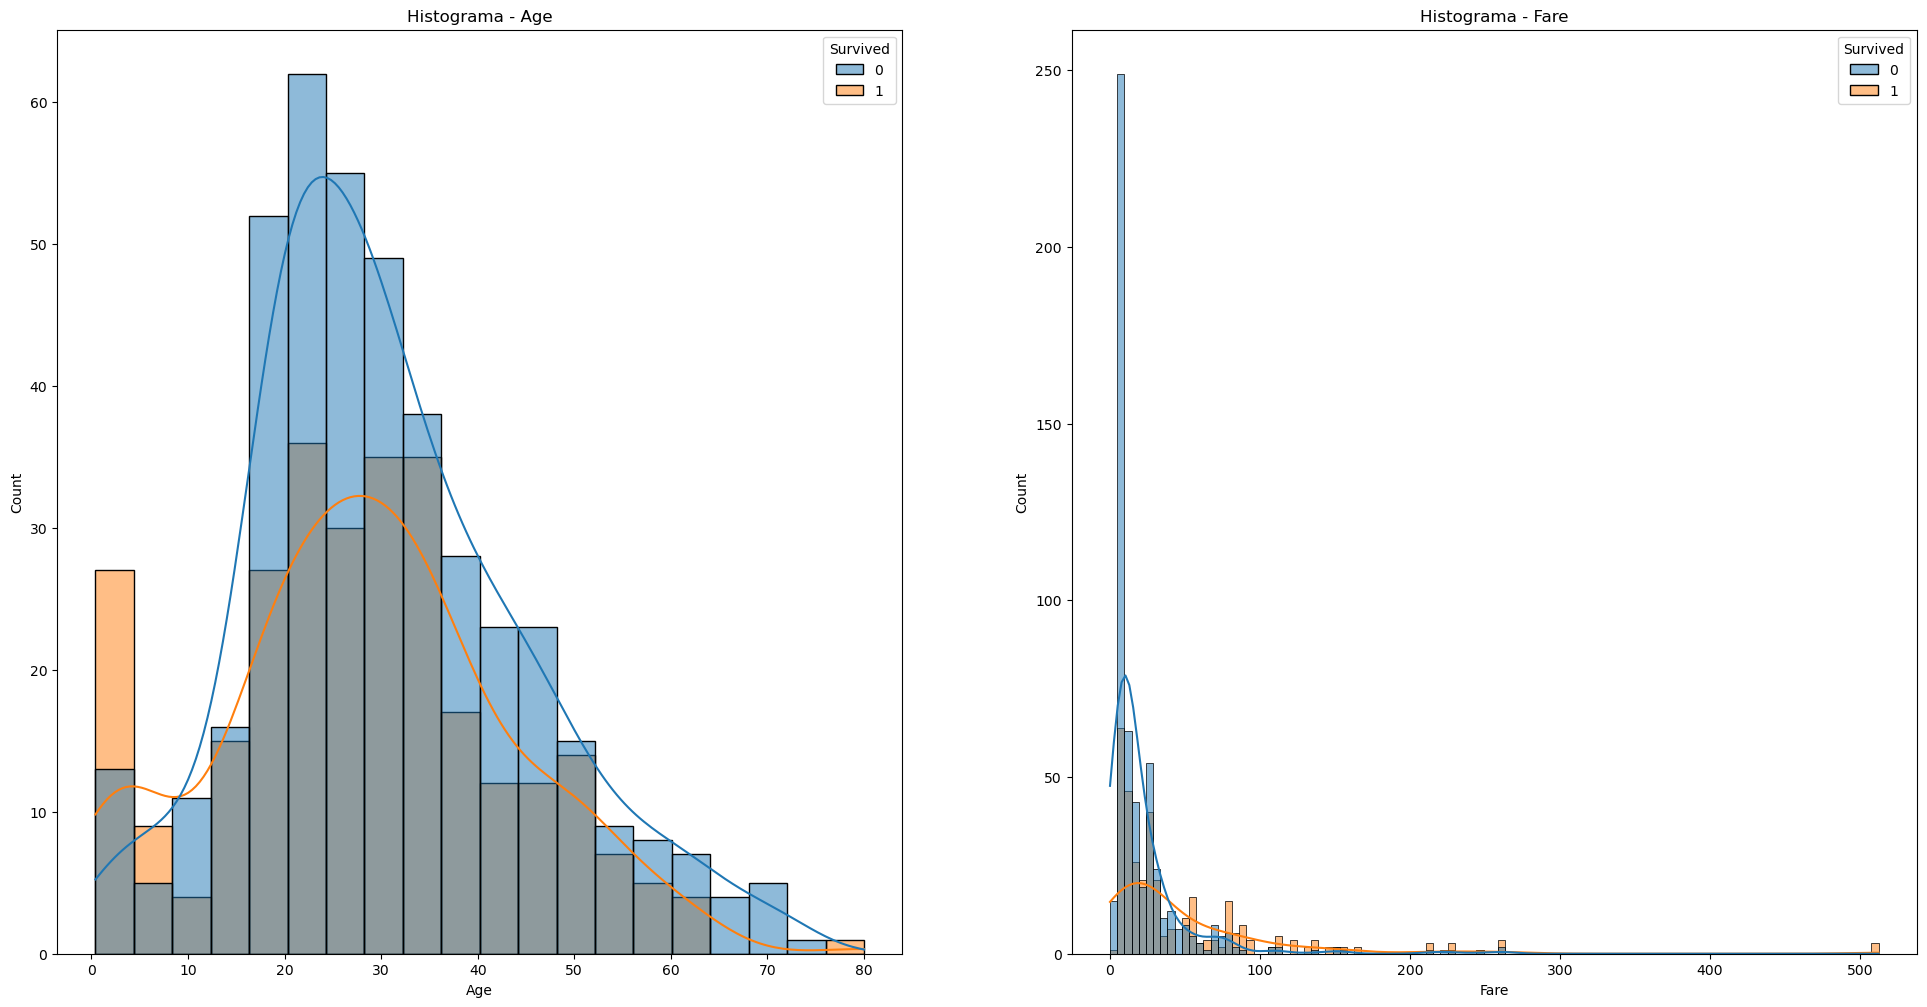

In [46]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((24,12))

sns.histplot(data=train, x='Age', hue='Survived', ax=axes[0], kde=True).set(title='Histograma - Age')
sns.histplot(data=train, x='Fare', hue='Survived', ax=axes[1], kde=True).set(title='Histograma - Fare')

[Text(0.5, 1.0, 'Boxplot - Fare')]

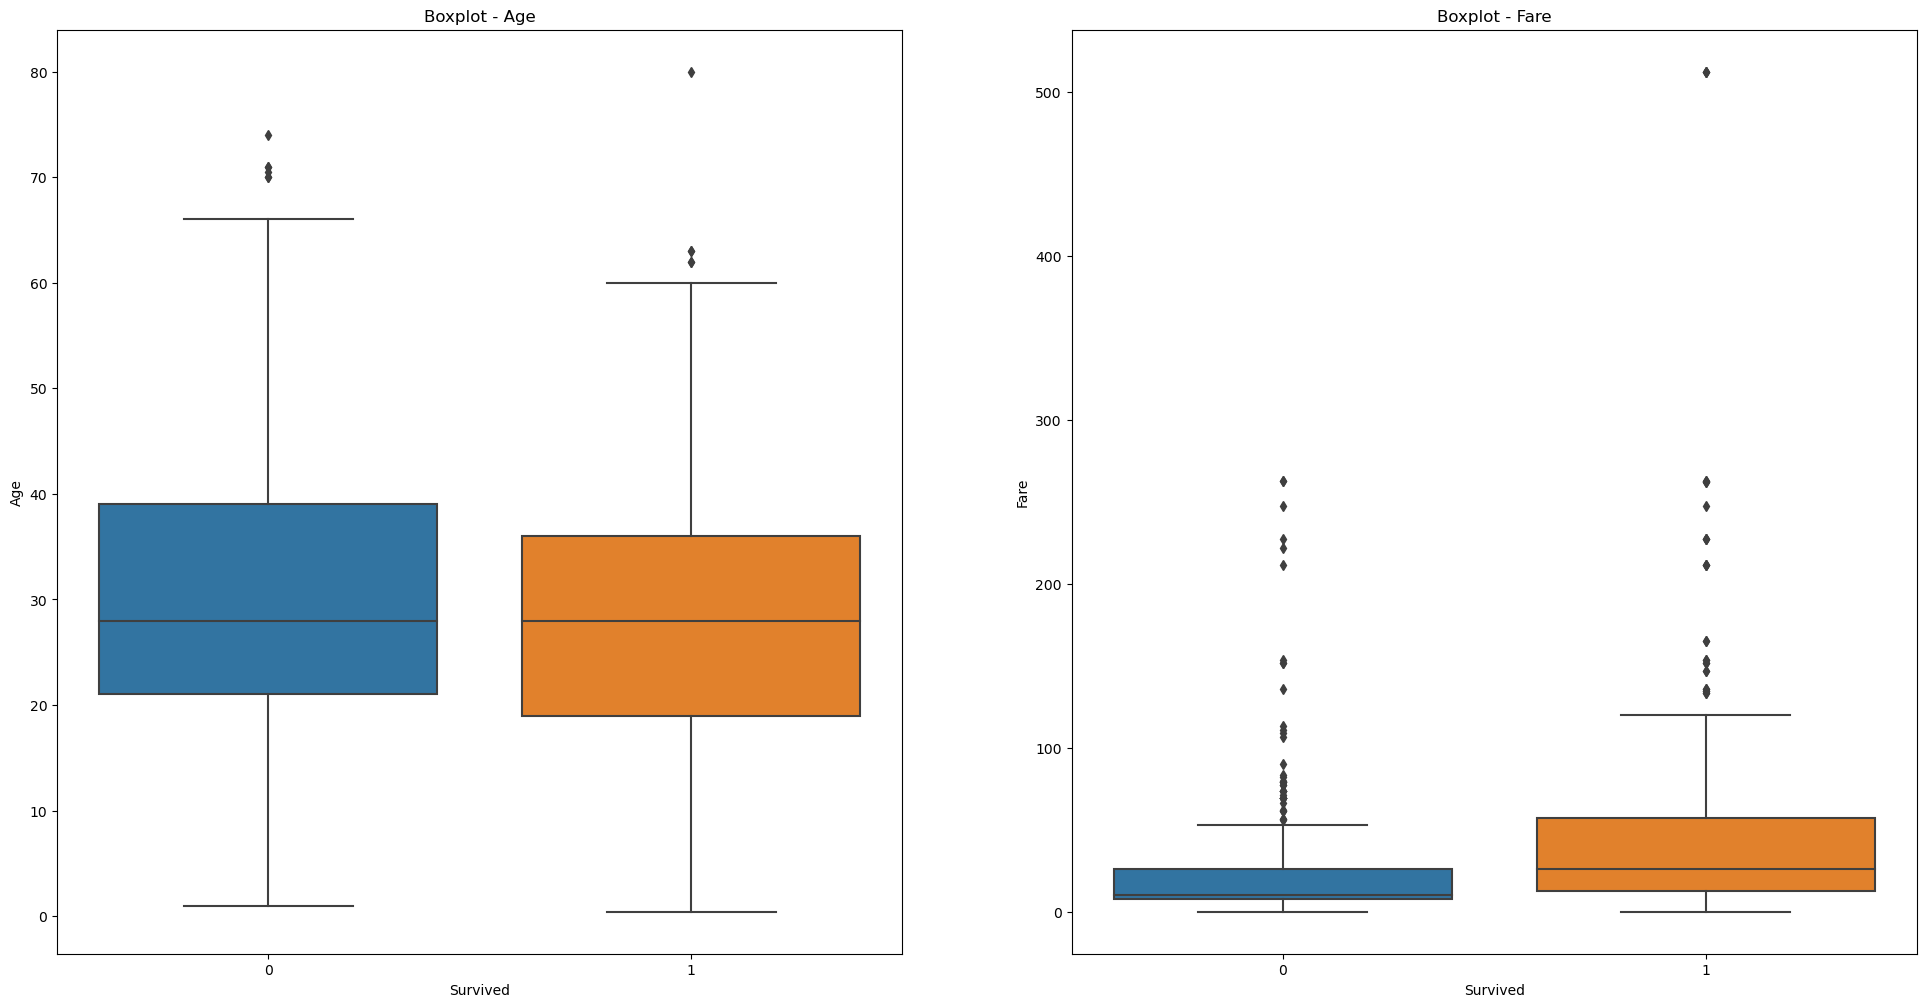

In [47]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((24,12))

sns.boxplot(data=train, x='Survived', y='Age', ax=axes[0]).set(title='Boxplot - Age')
sns.boxplot(data=train, x='Survived', y='Fare', ax=axes[1]).set(title='Boxplot - Fare')

Podemos ver que nosso dataset precisa de tratamento. As colunas 'Name', 'Sex', 'Ticket', 'Fare', 'Cabin' e 'Embarked' precisam ser adaptadas para o problema que estamos tentando resolver, e também podemos criar alguns novos recursos combinando ou agrupando as colunas existentes. Além disso, temos NaN's nas colunas 'Age', 'Cabin' e 'Embarked', que precisarão de tratamento.


Antes de iniciar o tratamento, vamos fazer cópias dos nossos dados para não perdê-los.

In [48]:
original_train = train.copy() 
df = train.copy()

## Premissas e tratamento dos dados

Dando início ao nosso tratamento, partimos das seguintes premissas e optamos pelas seguintes alterações:

- Para a coluna 'Cabin', faz mais sentido que saibamos se o passageiro tinha ou não uma cabine. Dessa forma, vamos criar uma coluna 'Has_Cabin', com valores 0 ou 1.

- A coluna 'SibSp' significa número de irmãos + cônjuge de uma pessoa a bordo. A coluna 'Parch' significa número de pais + filhos de uma pessoa a bordo. A melhor forma de analisarmos influência que a quantidade de familiares a bordo tem na sobrevivência de um passageiro é unificando esses dois dados em uma única coluna, que chamaremos de 'FamilySize'.

- Faz sentido criar uma coluna para saber se o passageiro estava viajando sozinho ou não. Criaremos a coluna 'IsAlone'.

- À primeira vista, a coluna 'Name' parece não ter importância na sobrevivência de um passageiro ou não. Por outro lado, foi levantada a hipótese de que talvez pessoas com título de Don ou Dr tenham sido privilegiadas na evacuação do navio. Sendo assim, vamos extrair dos nomes os títulos de cada passageiro e criar a coluna 'Title'.

- As colunas que não são numéricas serão transformadas para colunas numéricas.

Tratando NaNs

In [49]:
# Removendo todos os NaNs na coluna Embarked. Substituindo por S (Moda da coluna)
df['Embarked'] = df['Embarked'].fillna('S')
# Transformando em valores numéricos a coluna Embarked
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Removendo todos os NaNs na coluna Age
age_avg = df['Age'].mean()
age_std = df['Age'].std()
age_null_count = df['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
df.loc[np.isnan(df['Age']), 'Age'] = age_null_random_list
df['Age'] = df['Age'].astype(int)

Extraindo coluna que diz respeito a se o passageiro possui uma cabine

In [50]:
# Característica que indica se o passageiro tinha uma cabine no Titanic.
df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

Extraindo colunas que dizem a respeito do tamanho da família do passageiro

In [51]:
# Criando a coluna FamilySize como uma combinação de SibSp e Parch.
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Criando a coluna IsAlone a partir da coluna FamilySize
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


Extraindo coluna que diz respeito ao título do passageiro

In [52]:
# Criando função para extrair os títulos dos passageiros
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""

df['Title'] = df['Name'].apply(get_title)

# Agrupando todos os títulos não comuns em um único grupo chamado "Rare".
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Transformando em valores numéricos a coluna Sex
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Transformando em valores numéricos a coluna Title
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 4, "Miss": 5, "Rare": 3}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

[Text(0.5, 1.0, 'Histograma - Title (Título do passageiro)')]

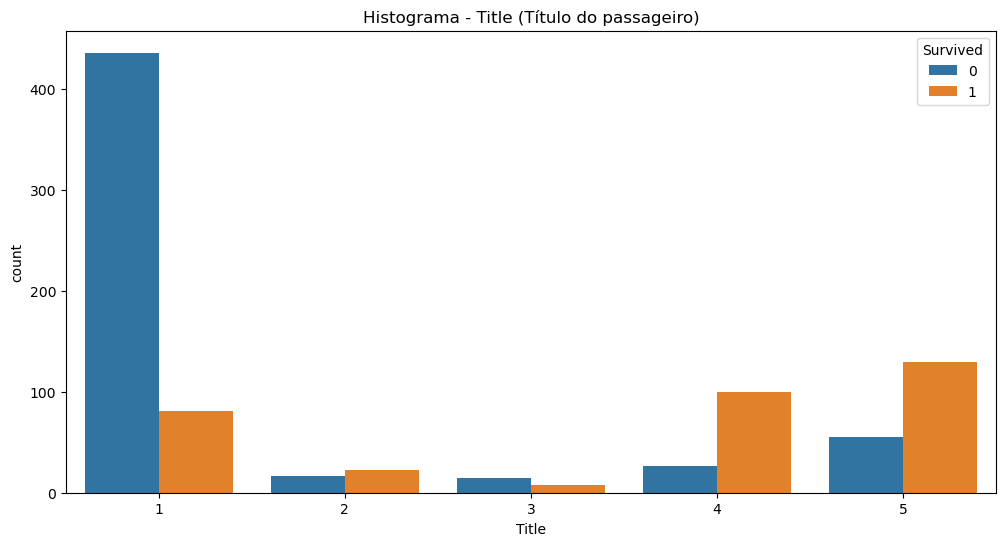

In [53]:
fig, axes = plt.subplots(1)
fig.set_size_inches((12,6))
sns.countplot(data=df, x='Title', hue='Survived').set(title='Histograma - Title (Título do passageiro)')

Feito isso, podemos dropar as colunas 'PassengerId', 'Name', 'Ticket', 'Cabin' e 'SibSp', pois não serão mais necessárias.

In [54]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
df = df.drop(drop_elements, axis = 1)

In [55]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,22,0,7.2500,0,0,2,0,1
1,1,1,0,38,0,71.2833,1,1,2,0,4
2,1,3,0,26,0,7.9250,0,0,1,1,5
3,1,1,0,35,0,53.1000,0,1,2,0,4
4,0,3,1,35,0,8.0500,0,0,1,1,1


[Text(0.5, 1.0, 'Histograma - FamilySize (Tamanho da família)')]

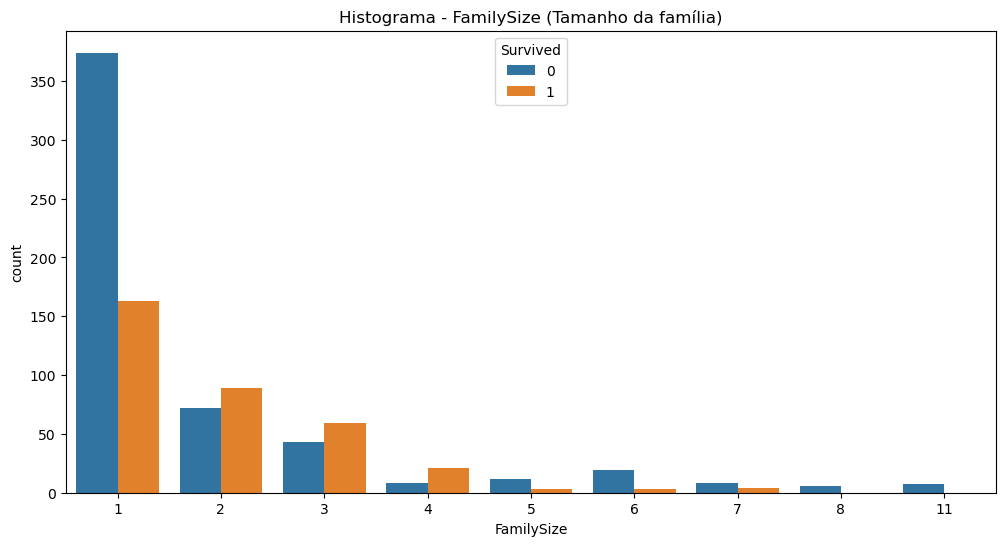

In [56]:
fig, axes = plt.subplots(1)
fig.set_size_inches((12,6))
sns.countplot(data=df, x='FamilySize', hue='Survived').set(title='Histograma - FamilySize (Tamanho da família)')

[Text(0.5, 1.0, 'Histograma - isAlone (Passageiros sozinhos)')]

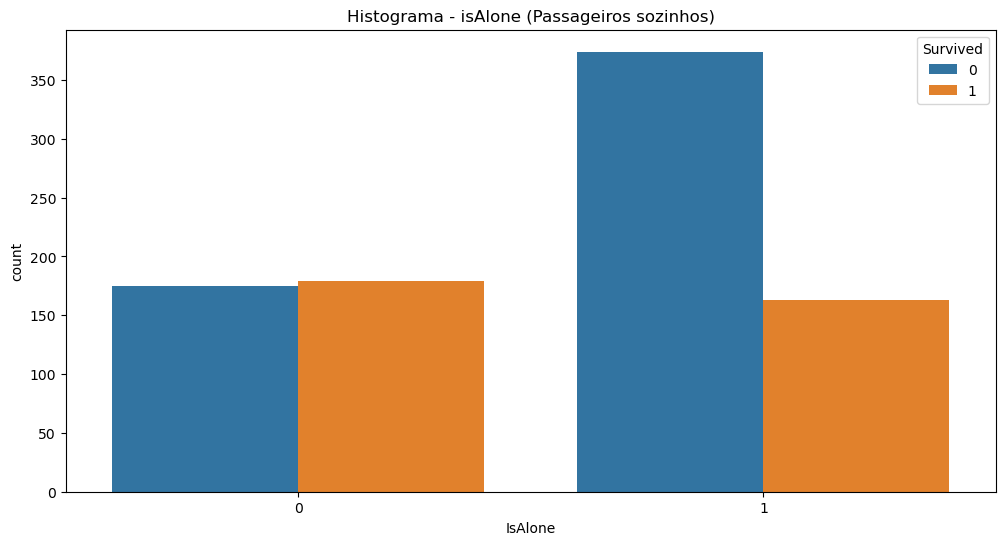

In [57]:
fig, axes = plt.subplots(1)
fig.set_size_inches((12,6))
sns.countplot(data=df, x='IsAlone', hue='Survived').set(title='Histograma - isAlone (Passageiros sozinhos)')

Nosso dataset agora está tratado, com apenas valores numéricos e recursos potencialmente significativos. Vamos explorar a relação entre nossas variáveis ​​plotando a Correlação de Pearson entre todos os atributos em nosso conjunto de dados.

## Análise de correlação

<AxesSubplot:>

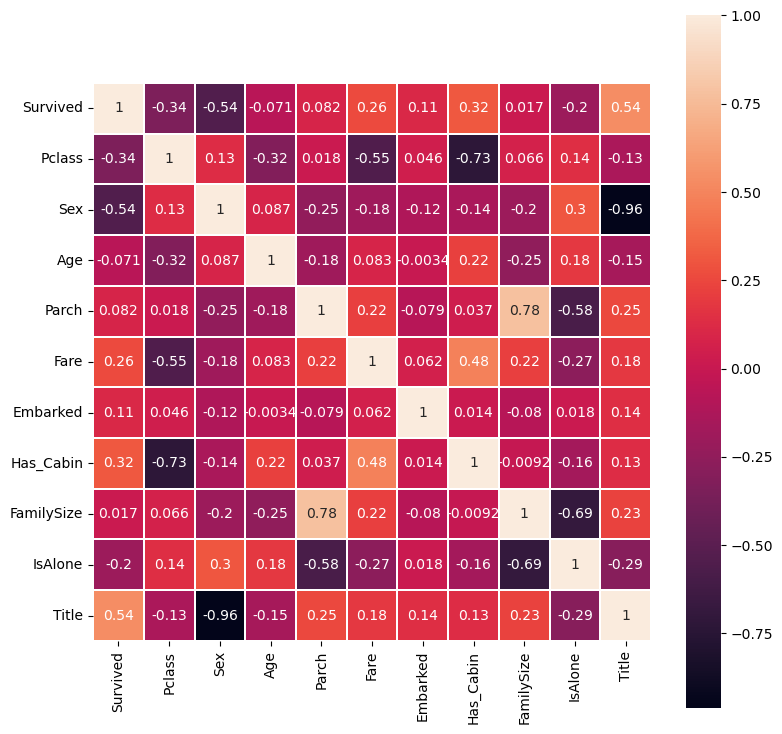

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, annot=True)

Analisando o mapa de calor, vemos que 'Sex' e 'Title' têm as correlações mais altas (em termos absolutos) com a classe 'Survived': 0,54 e 0,49, respectivamente. Mas a correlação absoluta entre ambos também é muito alta (0,86, a mais alta em nosso conjunto de dados), então eles provavelmente estão carregando a mesma informação e usar os dois como entradas para o mesmo modelo não seria uma boa ideia. É muito provável que um deles seja usado para o primeiro nó em nossa árvore de decisão final, então vamos explorar ainda mais esses recursos e compará-los.

### Title vs Sex: Qual coluna usar?

Você pode facilmente comparar características e sua relação com a classe agrupando-as e calculando algumas estatísticas básicas para cada grupo. O código abaixo faz exatamente isso em uma única linha e explica o significado de cada métrica ao trabalhar com uma classe binária.

In [59]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.575000    40   23
3      0.347826    23    8
4      0.793651   126  100
5      0.702703   185  130

Como "Survived" é uma classe binária (0 ou 1), essas métricas agrupadas pela característica "Title" representam:

- MEAN: taxa de sobrevivência
- COUNT: observações totais
- SUM: pessoas que sobreviveram

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

In [60]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

Já que "Survived" é uma característica binária (0 ou 1), essas métricas agrupadas pela característica "Sex" representam:

- MEAN: taxa de sobrevivência
- COUNT: observações totais
- SUM: pessoas que sobreviveram

sex_mapping = {{'female': 0, 'male': 1}} 

Os dados mostram que menos 'Mr.' sobreviveram (15,67%) do que homens em geral (18,89%): Título parece, portanto, ser mais útil do que Sexo para o nosso propósito. Isso pode ser porque Título implicitamente inclui informações sobre Sexo na maioria dos casos. Para verificar isso, podemos usar a cópia que fizemos dos dados originais de treinamento sem mapeamentos e verificar a distribuição de Sexo agrupada por Título.

In [61]:
title_and_sex = original_train.copy()[['Name', 'Sex']]
title_and_sex['Title'] = title_and_sex['Name'].apply(get_title)
title_and_sex['Sex'] = title_and_sex['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
title_and_sex[['Title', 'Sex']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

Sex           
              mean count  sum
Title                        
Capt      1.000000     1    1
Col       1.000000     2    2
Countess  0.000000     1    0
Don       1.000000     1    1
Dr        0.857143     7    6
Jonkheer  1.000000     1    1
Lady      0.000000     1    0
Major     1.000000     2    2
Master    1.000000    40   40
Miss      0.000000   182    0
Mlle      0.000000     2    0
Mme       0.000000     1    0
Mr        1.000000   517  517
Mrs       0.000000   125    0
Ms        0.000000     1    0
Rev       1.000000     6    6
Sir       1.000000     1    1

Descobrimos que, exceto por uma única observação (uma mulher com o título 'Dr'), todas as observações para um determinado Título compartilham o mesmo Sexo. Portanto, a característica Título está capturando todas as informações presentes em Sexo. Além disso, Título pode ser mais valioso para nossa tarefa, capturando outras características dos indivíduos, como idade, classe social, personalidade, etc.

É verdade que, ao agrupar títulos raros em uma única categoria, estamos perdendo algumas informações sobre Sexo. Poderíamos criar duas categorias "Rare Male" and "Rare Female", mas a separação seria quase insignificante devido à baixa ocorrência de Títulos "Raros" (2,6%, 23 de 891 amostras).

Graças a essa análise detalhada das características Sexo e Título, vimos que, mesmo que a correlação da característica Sexo com a classe Sobreviveu tenha sido maior, Título é uma característica mais rica porque carrega informações sobre Sexo, mas também adiciona outras características. Portanto, é muito provável que Título seja a primeira característica em nossa árvore de decisão final, tornando Sexo inútil após essa divisão inicial.

In [62]:
drop_elements = ['Sex']
df = df.drop(drop_elements, axis = 1)

In [63]:
df.head()

,Survived,Pclass,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,22,0,7.2500,0,0,2,0,1
1,1,1,38,0,71.2833,1,1,2,0,4
2,1,3,26,0,7.9250,0,0,1,1,5
3,1,1,35,0,53.1000,0,1,2,0,4
4,0,3,35,0,8.0500,0,0,1,1,1


# Modelagem

**Encontrando a melhor profundidade da árvore com a ajuda da Validação Cruzada**

Depois de explorar os dados, vamos descobrir quanto deles pode ser relevante para a nossa árvore de decisão. Vamos iterar por todas as profundidades possíveis e medir a precisão com a Validação Cruzada.

In [64]:
#!pip install optuna

In [65]:
cv = KFold(n_splits=5) # Número desejado de dobras de validação cruzada
accuracies = list()
depth_range = range(1, 10)

# Testando max_depths de 1 até o máximo de atributos
# Descomentar prints para obter detalhes sobre cada passagem de validação cruzada
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] # Extraindo train data com cv indices
        f_valid = df.loc[valid_fold] # Extraindo dados válidos com cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # Nós ajustamos o modelo com os dados de treinamento da dobra
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# Nós calculamos a precisão com os dados de validação da dobra
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
results = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
results = results[["Max Depth", "Average Accuracy"]]
print(results.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782280
         2          0.796887
         3          0.820419
         4          0.812542
         5          0.808135
         6          0.809234
         7          0.808085
         8          0.810357
         9          0.795732


In [66]:
best_max_depth = results.sort_values(by=['Average Accuracy'], ascending=False).iloc[0, 0]
best_accuracy = results.sort_values(by=['Average Accuracy'], ascending=False).iloc[0, 1]
f"Melhor max_depth={best_max_depth} (Average Accuracy = {best_accuracy})"

'Melhor max_depth=3 (Average Accuracy = 0.8204193082669009)'

## Automatizando o tuning de hiperparâmetros do modelo

Optuna é uma framework de otimização de hiperparâmetros que tem funções bastante convenientes para ir testando diferentes configurações do modelo. Isso é feito com a definição de uma função objetivo e o uso de métodos como .suggest_int,.suggest_float, etc.

In [94]:
import optuna

def objective(trial):

    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    min_samples_split = trial.suggest_float('min_samples_split', 0.0005, 0.1)

    cv = KFold(n_splits=5) # Número desejado de dobras de validação cruzada

    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion = criterion,max_depth = max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] # Extraindo train data com cv indices
        f_valid = df.loc[valid_fold] # Extraindo dados válidos com cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), y = f_train["Survived"]) # Nós ajustamos o modelo com os dados de treinamento da dobra
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), y = f_valid["Survived"])# Nós calculamos a precisão com os dados de validação da dobra
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)

    return avg

In [95]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

[I 2023-04-11 12:21:50,427] A new study created in memory with name: no-name-5299f973-8585-48e2-917b-3b969cc9fbf0
[I 2023-04-11 12:21:50,491] Trial 0 finished with value: 0.8159249262444291 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 0.06880588121473258}. Best is trial 0 with value: 0.8159249262444291.
[I 2023-04-11 12:21:50,564] Trial 1 finished with value: 0.7923545289059067 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 21, 'min_samples_split': 0.05141856472955396}. Best is trial 0 with value: 0.8159249262444291.
[I 2023-04-11 12:21:50,620] Trial 2 finished with value: 0.8002134203753688 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 0.028162278177208594}. Best is trial 0 with value: 0.8159249262444291.
[I 2023-04-11 12:21:50,708] Trial 3 finished with value: 0.8136777352331931 and parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_lea

In [96]:
study.best_params

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 12,
 'min_samples_split': 0.04150088796158191}

Por curiosidade, vamos ver abaixo como diferentes valores dos parâmetros de treinamento fizeram o score da acurácia média do KFold variar

Os 10 melhores resultados de todas as combinações possíveis do Optuna:

In [97]:
interesting_cols = ['value', 'params_criterion', 'params_max_depth', 'params_min_samples_leaf', 'params_min_samples_split']

optuna_df = study.trials_dataframe()
optuna_df.sort_values('value', ascending=False)[interesting_cols].head(10)

,value,params_criterion,params_max_depth,params_min_samples_leaf,params_min_samples_split
213,0.8204,entropy,4,14,0.039575
227,0.8204,entropy,4,14,0.037641
273,0.8204,entropy,4,13,0.041752
269,0.8204,entropy,4,13,0.040468
224,0.8204,entropy,4,14,0.039434
264,0.8204,entropy,4,13,0.042407
225,0.8204,entropy,4,14,0.039780
260,0.8204,entropy,4,13,0.038294
259,0.8204,entropy,4,14,0.042881
229,0.8204,entropy,4,14,0.042226


Os dois melhores resultados para cada possibilidade do parâmetro "Criterion":

In [98]:
optuna_df.sort_values('value', ascending=False).groupby(['params_criterion'])[interesting_cols].head(2)

,value,params_criterion,params_max_depth,params_min_samples_leaf,params_min_samples_split
213,0.820400,entropy,4,14,0.039575
227,0.820400,entropy,4,14,0.037641
3,0.813678,gini,3,25,0.092708
179,0.812554,gini,3,11,0.090267


Melhores resultados para o parâmetro "max_depth" menor ou igual a 3:

In [99]:
optuna_df.query('params_max_depth < 4').sort_values('value', ascending=False)[interesting_cols]

,value,params_criterion,params_max_depth,params_min_samples_leaf,params_min_samples_split
164,0.817049,entropy,3,6,0.079058
28,0.817049,entropy,3,11,0.063938
143,0.817049,entropy,3,11,0.074398
77,0.817049,entropy,3,10,0.071180
127,0.817049,entropy,3,9,0.093797
...,...,...,...,...,...
10,0.782280,entropy,1,1,0.074172
49,0.782280,entropy,1,14,0.095402
26,0.782280,entropy,1,13,0.071792
15,0.782280,entropy,1,18,0.099767


Dito isso vamos comparar o nosso modelo antigo com o melhor modelo obtido pelo optuna no mesmo KFold:

In [100]:
best_criterion_opt = study.best_params['criterion']
best_max_depth_opt = study.best_params['max_depth']
best_min_samples_leaf_opt = study.best_params['min_samples_leaf']
best_min_samples_split_opt = study.best_params['min_samples_split']

ad_optuna = tree.DecisionTreeClassifier(criterion = best_criterion_opt,max_depth = best_max_depth_opt, min_samples_leaf=best_min_samples_leaf_opt, min_samples_split=best_min_samples_split_opt)
ad_simple = tree.DecisionTreeClassifier(max_depth=best_max_depth)


cv = KFold(n_splits=5) # Número desejado de dobras de validação cruzada
fold_accuracy_optuna = []
fold_accuracy_simple = []
for train_fold, valid_fold in cv.split(df):
    f_train = df.loc[train_fold] # Extraindo train data com cv indices
    f_valid = df.loc[valid_fold] # Extraindo dados válidos com cv indices

    ad_optuna.fit(X = f_train.drop(['Survived'], axis=1), y = f_train["Survived"]) # Nós ajustamos o modelo com os dados de treinamento da dobra
    valid_acc = ad_optuna.score(X = f_valid.drop(['Survived'], axis=1), y = f_valid["Survived"])# Nós calculamos a precisão com os dados de validação da dobra
    fold_accuracy_optuna.append(valid_acc)

    ad_simple.fit(X = f_train.drop(['Survived'], axis=1), y = f_train["Survived"]) # Nós ajustamos o modelo com os dados de treinamento da dobra
    valid_acc = ad_simple.score(X = f_valid.drop(['Survived'], axis=1), y = f_valid["Survived"])# Nós calculamos a precisão com os dados de validação da dobra
    fold_accuracy_simple.append(valid_acc)

avg_optuna = sum(fold_accuracy_optuna)/len(fold_accuracy_optuna)
avg_simple = sum(fold_accuracy_simple)/len(fold_accuracy_simple)

print(f"Kfold accuracy mean score (Optuna Model): {avg_optuna}")
print(f"Kfold accuracy mean score (Max depth tuned Model): {avg_simple}")

Kfold accuracy mean score (Optuna Model): 0.8204004770573097
Kfold accuracy mean score (Max depth tuned Model): 0.8204193082669009


Embora com resultados levemente melhores, vamos mostrar a árvore que foi obtida sem o uso do Optuna, visto que a mesma teve um tamanho menor e portanto nos dá uma maior facilidade em entender a decisão tomada pelo modelo. Essa foi a árvore com o parâmetro max_depth = 3

### Visualizando o modelo

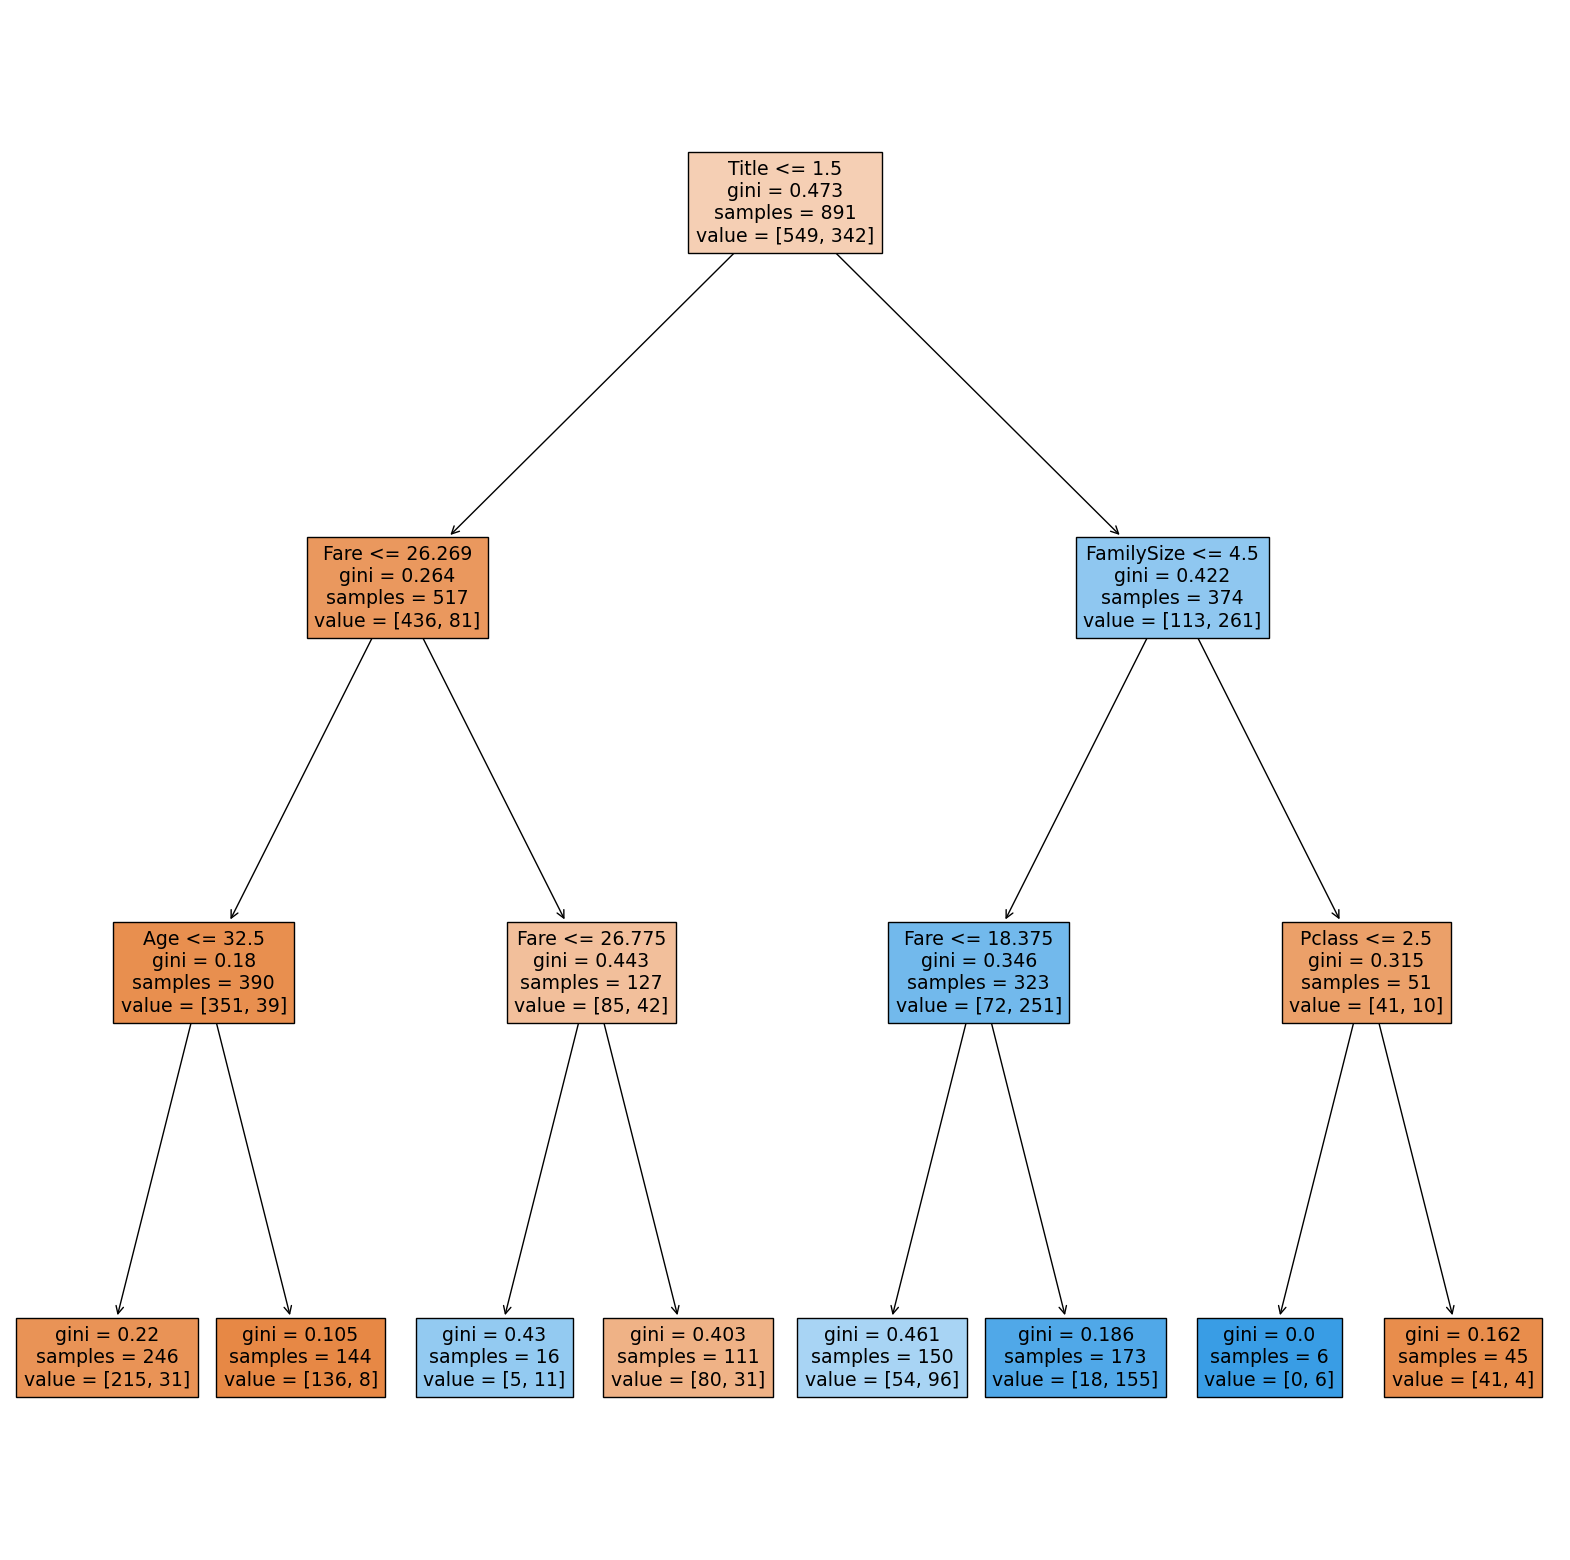

In [101]:
# Criando arrays Numpy dos dataframes de treino, teste e alvo (Survived) para alimentar nossos modelos
y_train = df['Survived']
x_train = df.drop(['Survived'], axis=1) 

# Criando árvore de decisão com max_depth
decision_tree = tree.DecisionTreeClassifier(max_depth = best_max_depth)
decision_tree.fit(x_train, y_train)

plt.figure(figsize=(20,20))
_ = tree.plot_tree(decision_tree, feature_names=list(df.drop(['Survived'], axis=1)), filled=True)

In [102]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

83.05

## Conclusões

O nosso melhor modelo, tunado com o Optuna, atingiu uma acurácia de aproximadamente 83,16% no teste do KFold. Já o modelo com o max_depth de 3, atingiu uma acurácia de 83,05% em todo o conjunto de dados de treinamento e aproximadamente 82,15% no teste do KFold. Esse último modelo, pode ser visualizado na figura acima.

Vamos explicar o gráfico acima. 

- A primeira linha de cada nó (exceto os da última linha) mostra a condição de divisão na forma "feature <= value".

- A seguir, encontramos a Impureza de Gini do nó. 

- "Samples" é o número de entradas contidas no nó.

- "Value" mostra a distribuição de classe das amostras ([count non_survived, count survived]).

- "class" corresponde à classe predominante de cada nó, e é assim que nosso modelo classificará uma observação. A cor também representa a classe, a opacidade aumentando com a distribuição real das amostras.

Nosso modelo pode ser resumido em 4 regras simples:

- Se a nossa observação incluir o título "Mr", então seguimos com o sentido da árvore para a esquerda (podemos perceber que a grande maioria dos nós nessa parte da árvore são laranjas).

- Se ela não incluir o título "Mr" seguimos pelo lado direito, onde constam a maior parte dos sobreviventes.

- Mantendo-se no lado direito a árvore (onde estão os indivíduos que não possuem o título de "Mr"), observa-se a classe onde estavam esses passageiros, separando os que estavam na primeira e segunda classe dos demais.

- Os passageiros de primeira e segunda classe tiveram o maior índice de sobrevivência dentre os grupos desse nível. Onde avaliou-se novamente o título desses, separando entre "Ms"e "Mrs" dos demais título (nesse caso "Master" e "Rare").

- A maior taxa de sobrevivência foi observada nos membros que possuiam o título de Ms"e "Mrs" e estavam nas duas primeiras classes.

Graças a essas regras, podemos inferir algumas informações sobre o naufrágio. Os "Misters" parecem ter honrado seus títulos e se sacrificado em favor de mulheres e homens com títulos mais exóticos como "Master" ou "Dr". 

Adicionalmente, podemos observar que passageiros da 3ª classe também tiveram menos chances de sobreviver, então provavelmente os passageiros pertencentes a classes sociais mais altas foram privilegiados, ou simplesmente as cabines da 3ª classe podem ter ficado mais longe dos botes salva-vidas.

Por fim, dentre esses membros mais privilegiados observou-se também uma taxa mais elevada de sobrevivência dentre as "Ms" e "Mrs", mostrando assim que provavelmente houve dentre esses membros mais privilegiados uma priorização no preenchimento dos botes salva-vidas com mulheres (e possivelmente crianças) como conta a história do famoso naufrágio.

### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf = RandomForestClassifier()
dt_simple = tree.DecisionTreeClassifier(max_depth = best_max_depth)
dt_optuna = tree.DecisionTreeClassifier(criterion = best_criterion_opt,max_depth = best_max_depth_opt, min_samples_leaf=best_min_samples_leaf_opt, min_samples_split=best_min_samples_split_opt)

cv = KFold(n_splits=5) # Número desejado de dobras de validação cruzada
fold_accuracy_rf = []
fold_accuracy_dt_simple = []
fold_accuracy_dt_optuna = []

for train_fold, valid_fold in cv.split(df):
    f_train = df.loc[train_fold] # Extraindo train data com cv indices
    f_valid = df.loc[valid_fold] # Extraindo dados válidos com cv indices

    rf.fit(X = f_train.drop(['Survived'], axis=1), y = f_train["Survived"]) # Nós ajustamos o modelo com os dados de treinamento da dobra
    valid_acc = rf.score(X = f_valid.drop(['Survived'], axis=1), y = f_valid["Survived"])# Nós calculamos a precisão com os dados de validação da dobra
    fold_accuracy_rf.append(valid_acc)

    dt_simple.fit(X = f_train.drop(['Survived'], axis=1), y = f_train["Survived"]) # Nós ajustamos o modelo com os dados de treinamento da dobra
    valid_acc = dt_simple.score(X = f_valid.drop(['Survived'], axis=1), y = f_valid["Survived"])# Nós calculamos a precisão com os dados de validação da dobra
    fold_accuracy_dt_simple.append(valid_acc)

    dt_optuna.fit(X = f_train.drop(['Survived'], axis=1), y = f_train["Survived"]) # Nós ajustamos o modelo com os dados de treinamento da dobra
    valid_acc = dt_optuna.score(X = f_valid.drop(['Survived'], axis=1), y = f_valid["Survived"])# Nós calculamos a precisão com os dados de validação da dobra
    fold_accuracy_dt_optuna.append(valid_acc)


avg_rf = sum(fold_accuracy_rf)/len(fold_accuracy_rf)
avg_dt_simple = sum(fold_accuracy_dt_simple)/len(fold_accuracy_dt_simple)
avg_dt_optuna = sum(fold_accuracy_dt_optuna)/len(fold_accuracy_dt_optuna)

print(f"Kfold accuracy mean score (Random Forest Model): {avg_rf}")
print(f"Kfold accuracy mean score (DT Simple Model): {avg_dt_simple}")
print(f"Kfold accuracy mean score (DT Optuna Model): {avg_dt_optuna}")


Kfold accuracy mean score (Random Forest Model): 0.8148013307388112
Kfold accuracy mean score (DT Simple Model): 0.821542903772519
Kfold accuracy mean score (DT Optuna Model): 0.8204004770573097


Dessa forma, podemos ver que as duas decision trees, tanto a que teve apenas o parâmetro "max_depth" tunado, quanto a deicison tree tunada usando a framework Optuna conseguiram superar o modelo de Random Forest default

Abaixo, para que possamos ver um pouco da complexidade do modelo de random forest, printamos as duas primeiras árvores do ensemble:

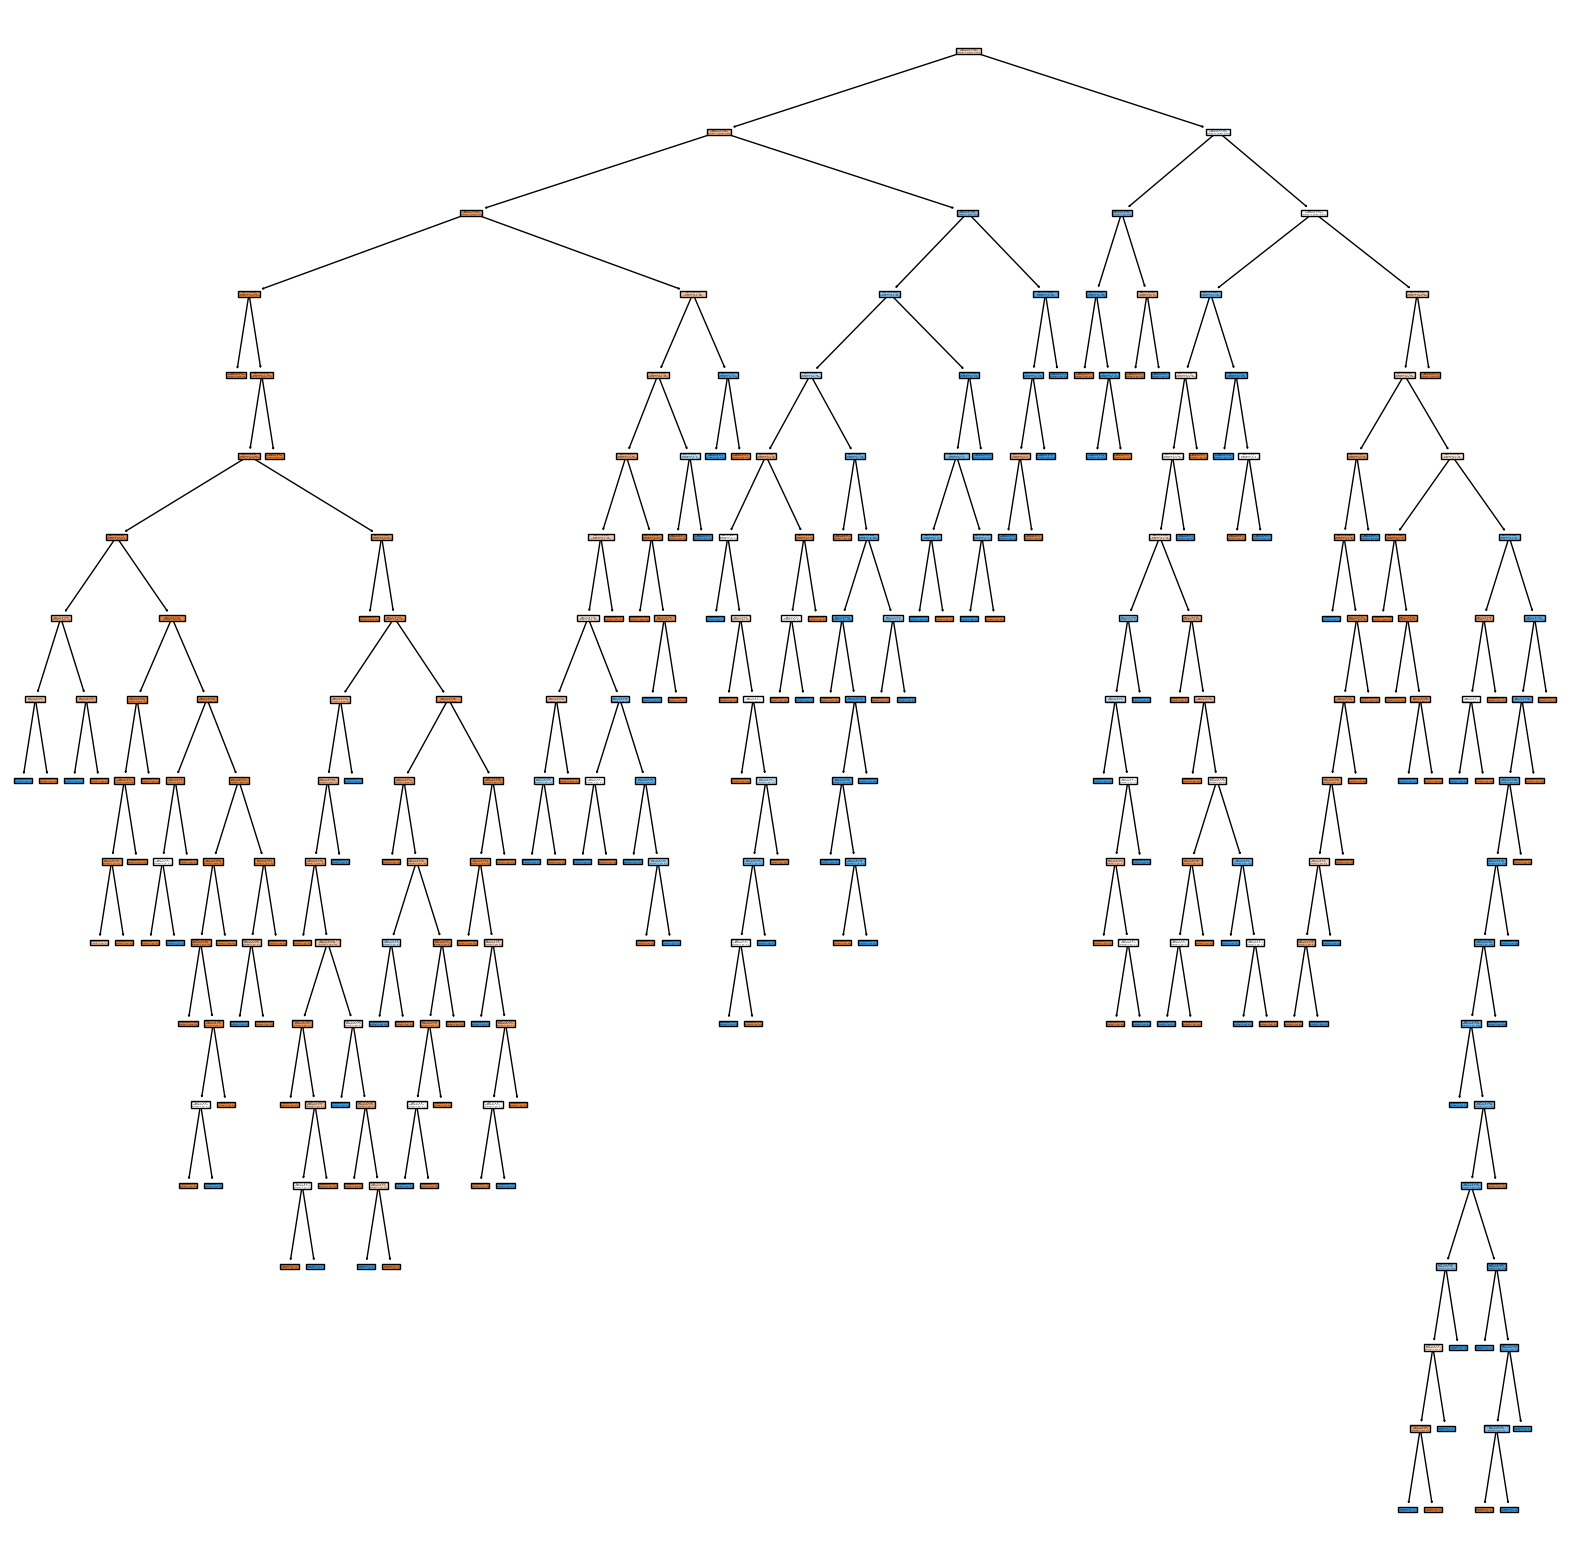

In [105]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=list(train.drop(['Survived'], axis=1)), filled=True)

In [106]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[1], feature_names=list(train.drop(['Survived'], axis=1)), filled=True)